## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4           Y
0  79.084446   553.265783  0.186310  8.184055  130.113620
1  18.406508   924.472182  0.999825  7.945038  924.472132
2  52.834476   897.164761  0.006688  7.224626   53.369510
3  62.256968   897.426292  0.248872  8.527656  231.857113
4  59.300379  1755.418861  0.394979  2.707892  695.930066


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9547388	total: 69.7ms	remaining: 1m 9s
1:	learn: 0.9448053	total: 70.1ms	remaining: 35s
2:	learn: 0.9336436	total: 70.6ms	remaining: 23.5s
3:	learn: 0.9234351	total: 71.2ms	remaining: 17.7s
4:	learn: 0.9107915	total: 71.7ms	remaining: 14.3s
5:	learn: 0.9010238	total: 72.2ms	remaining: 12s
6:	learn: 0.8893737	total: 72.8ms	remaining: 10.3s
7:	learn: 0.8797237	total: 73.4ms	remaining: 9.11s
8:	learn: 0.8680163	total: 73.9ms	remaining: 8.14s
9:	learn: 0.8561482	total: 74.5ms	remaining: 7.37s
10:	learn: 0.8460579	total: 75.1ms	remaining: 6.75s
11:	learn: 0.8333320	total: 75.5ms	remaining: 6.22s
12:	learn: 0.8231434	total: 76ms	remaining: 5.77s
13:	learn: 0.8122053	total: 76.5ms	remaining: 5.39s
14:	learn: 0.8027893	total: 77ms	remaining: 5.06s
15:	learn: 0.7935389	total: 77.6ms	remaining: 4.77s
16:	learn: 0.7834927	total: 78ms	remaining: 4.51s
17:	learn: 0.7735769	total: 78.5ms	remaining: 4.29s
18:	learn: 0.7667373	total: 78.9ms	remaining: 4.08s
19

84:	learn: 0.3754908	total: 108ms	remaining: 1.16s
85:	learn: 0.3717579	total: 108ms	remaining: 1.15s
86:	learn: 0.3683464	total: 108ms	remaining: 1.14s
87:	learn: 0.3648893	total: 110ms	remaining: 1.13s
88:	learn: 0.3617725	total: 110ms	remaining: 1.13s
89:	learn: 0.3573494	total: 110ms	remaining: 1.11s
90:	learn: 0.3541196	total: 111ms	remaining: 1.11s
91:	learn: 0.3497984	total: 111ms	remaining: 1.1s
92:	learn: 0.3467511	total: 112ms	remaining: 1.09s
93:	learn: 0.3437237	total: 112ms	remaining: 1.08s
94:	learn: 0.3405106	total: 113ms	remaining: 1.08s
95:	learn: 0.3374538	total: 113ms	remaining: 1.07s
96:	learn: 0.3343762	total: 114ms	remaining: 1.06s
97:	learn: 0.3315665	total: 115ms	remaining: 1.05s
98:	learn: 0.3284726	total: 115ms	remaining: 1.05s
99:	learn: 0.3259615	total: 115ms	remaining: 1.04s
100:	learn: 0.3233800	total: 116ms	remaining: 1.03s
101:	learn: 0.3204999	total: 116ms	remaining: 1.02s
102:	learn: 0.3170761	total: 117ms	remaining: 1.02s
103:	learn: 0.3146890	total: 

260:	learn: 0.1068738	total: 186ms	remaining: 527ms
261:	learn: 0.1062332	total: 187ms	remaining: 526ms
262:	learn: 0.1057173	total: 187ms	remaining: 525ms
263:	learn: 0.1052173	total: 188ms	remaining: 523ms
264:	learn: 0.1044881	total: 188ms	remaining: 522ms
265:	learn: 0.1039307	total: 189ms	remaining: 521ms
266:	learn: 0.1033518	total: 189ms	remaining: 519ms
267:	learn: 0.1027041	total: 189ms	remaining: 517ms
268:	learn: 0.1022614	total: 190ms	remaining: 516ms
269:	learn: 0.1016312	total: 190ms	remaining: 515ms
270:	learn: 0.1012431	total: 191ms	remaining: 513ms
271:	learn: 0.1008423	total: 191ms	remaining: 512ms
272:	learn: 0.1001565	total: 192ms	remaining: 511ms
273:	learn: 0.0996470	total: 192ms	remaining: 509ms
274:	learn: 0.0988918	total: 193ms	remaining: 508ms
275:	learn: 0.0986019	total: 193ms	remaining: 507ms
276:	learn: 0.0980459	total: 194ms	remaining: 505ms
277:	learn: 0.0973005	total: 194ms	remaining: 504ms
278:	learn: 0.0969351	total: 194ms	remaining: 502ms
279:	learn: 

495:	learn: 0.0325075	total: 290ms	remaining: 294ms
496:	learn: 0.0322890	total: 290ms	remaining: 294ms
497:	learn: 0.0321353	total: 291ms	remaining: 293ms
498:	learn: 0.0320156	total: 291ms	remaining: 292ms
499:	learn: 0.0318583	total: 292ms	remaining: 292ms
500:	learn: 0.0317001	total: 292ms	remaining: 291ms
501:	learn: 0.0315442	total: 293ms	remaining: 290ms
502:	learn: 0.0313903	total: 293ms	remaining: 290ms
503:	learn: 0.0313037	total: 294ms	remaining: 289ms
504:	learn: 0.0311598	total: 294ms	remaining: 288ms
505:	learn: 0.0310111	total: 295ms	remaining: 288ms
506:	learn: 0.0308610	total: 295ms	remaining: 287ms
507:	learn: 0.0306951	total: 295ms	remaining: 286ms
508:	learn: 0.0305245	total: 296ms	remaining: 286ms
509:	learn: 0.0303085	total: 296ms	remaining: 285ms
510:	learn: 0.0301708	total: 297ms	remaining: 284ms
511:	learn: 0.0300505	total: 297ms	remaining: 283ms
512:	learn: 0.0299172	total: 298ms	remaining: 283ms
513:	learn: 0.0297868	total: 298ms	remaining: 282ms
514:	learn: 

687:	learn: 0.0181583	total: 369ms	remaining: 167ms
688:	learn: 0.0181494	total: 369ms	remaining: 167ms
689:	learn: 0.0180796	total: 370ms	remaining: 166ms
690:	learn: 0.0180707	total: 370ms	remaining: 165ms
691:	learn: 0.0180208	total: 370ms	remaining: 165ms
692:	learn: 0.0179549	total: 371ms	remaining: 164ms
693:	learn: 0.0178971	total: 371ms	remaining: 164ms
694:	learn: 0.0178103	total: 372ms	remaining: 163ms
695:	learn: 0.0177357	total: 372ms	remaining: 163ms
696:	learn: 0.0176944	total: 372ms	remaining: 162ms
697:	learn: 0.0176462	total: 373ms	remaining: 161ms
698:	learn: 0.0176058	total: 373ms	remaining: 161ms
699:	learn: 0.0175428	total: 374ms	remaining: 160ms
700:	learn: 0.0174430	total: 374ms	remaining: 159ms
701:	learn: 0.0173455	total: 374ms	remaining: 159ms
702:	learn: 0.0173064	total: 375ms	remaining: 158ms
703:	learn: 0.0172221	total: 375ms	remaining: 158ms
704:	learn: 0.0171769	total: 376ms	remaining: 157ms
705:	learn: 0.0170951	total: 377ms	remaining: 157ms
706:	learn: 

928:	learn: 0.0077783	total: 472ms	remaining: 36.1ms
929:	learn: 0.0077439	total: 473ms	remaining: 35.6ms
930:	learn: 0.0077385	total: 473ms	remaining: 35.1ms
931:	learn: 0.0077015	total: 473ms	remaining: 34.5ms
932:	learn: 0.0076972	total: 474ms	remaining: 34ms
933:	learn: 0.0076744	total: 474ms	remaining: 33.5ms
934:	learn: 0.0076409	total: 475ms	remaining: 33ms
935:	learn: 0.0076162	total: 475ms	remaining: 32.5ms
936:	learn: 0.0075834	total: 475ms	remaining: 32ms
937:	learn: 0.0075592	total: 476ms	remaining: 31.4ms
938:	learn: 0.0075479	total: 476ms	remaining: 30.9ms
939:	learn: 0.0075334	total: 476ms	remaining: 30.4ms
940:	learn: 0.0075099	total: 477ms	remaining: 29.9ms
941:	learn: 0.0074988	total: 477ms	remaining: 29.4ms
942:	learn: 0.0074881	total: 478ms	remaining: 28.9ms
943:	learn: 0.0074740	total: 478ms	remaining: 28.4ms
944:	learn: 0.0074635	total: 479ms	remaining: 27.9ms
945:	learn: 0.0074318	total: 479ms	remaining: 27.3ms
946:	learn: 0.0074008	total: 480ms	remaining: 26.8ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

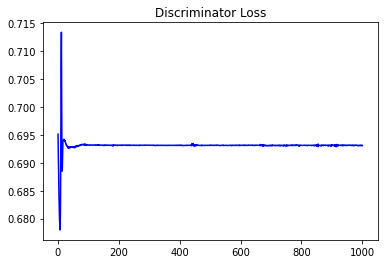

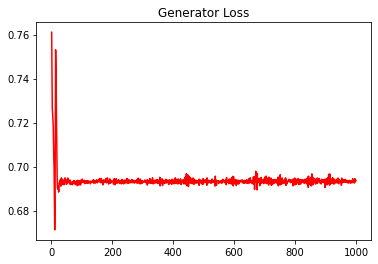

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.03052560761478854


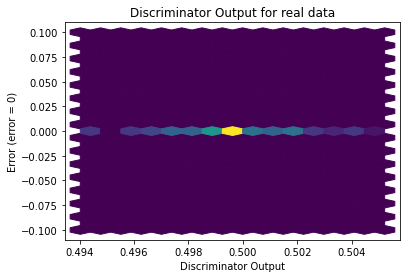

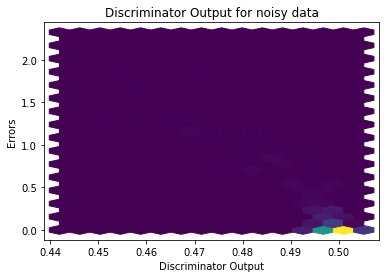

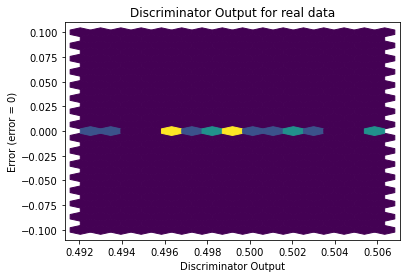

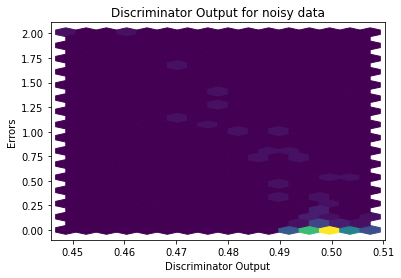

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


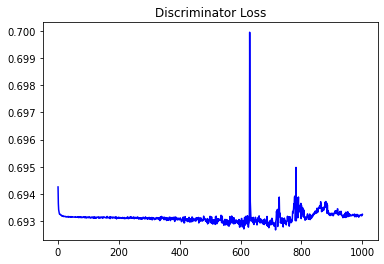

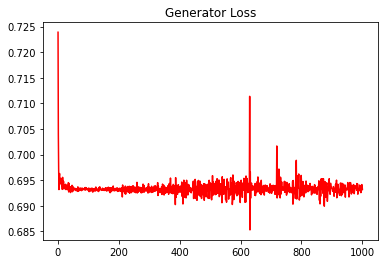

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.05239658480793023


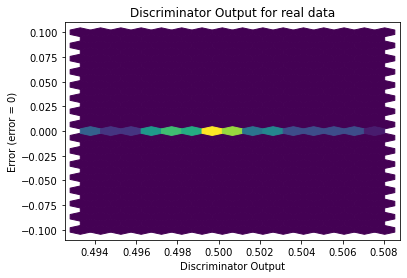

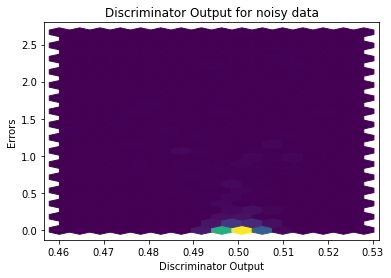

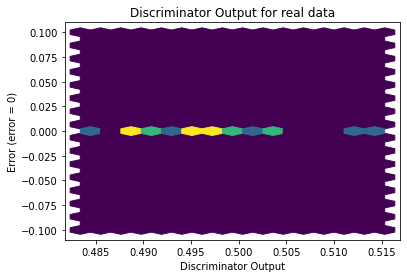

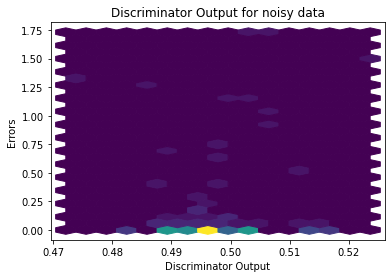

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0535]], requires_grad=True)
